In [1]:
import seaborn as sb
from scipy.stats.stats import pearsonr
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 22}

matplotlib.rc('font', **font)

In [2]:
df = pd.read_csv('test.csv')
df['Year'] = [int(x[-5:-1]) for x in (df.Name)]

In [3]:
del df[df.columns[0]]
df.Score = [float(x.split(' ')[1]) for x in df.Score]

In [4]:
df.head()

,Name,Description,Genres,Status,Type,Episodes,Score,Ranked,Popularity,Members,Year
0,Kimi no Na wa. (2016),"Mitsuha Miyamizu, a high school girl, yearns t...","Drama, Romance, School, Supernatural",Finished Airing,Movie,1,9.30,1,83,"379,600",2016
1,Fullmetal Alchemist: Brotherhood (2009),"""In order for something to be obtained, someth...","Action, Adventure, Drama, Fantasy, Magic, Mil...",Finished Airing,TV,64,9.25,2,4,"909,323",2009
2,Gintama° (2015),"Gintoki, Shinpachi, and Kagura return as the f...","Action, Comedy, Historical, Parody, Samurai, ...",Finished Airing,TV,51,9.23,3,437,"140,761",2015
3,Steins;Gate (2011),The self-proclaimed mad scientist Rintarou Oka...,"Sci-Fi, Thriller",Finished Airing,TV,24,9.16,4,7,"775,852",2011
4,Gintama' (2011),"After a one-year hiatus, Shinpachi Shimura ret...","Action, Comedy, Historical, Parody, Samurai, ...",Finished Airing,TV,51,9.15,5,336,"171,561",2011


C:\Users\Caleb\AppData\Roaming\Python\Python27\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


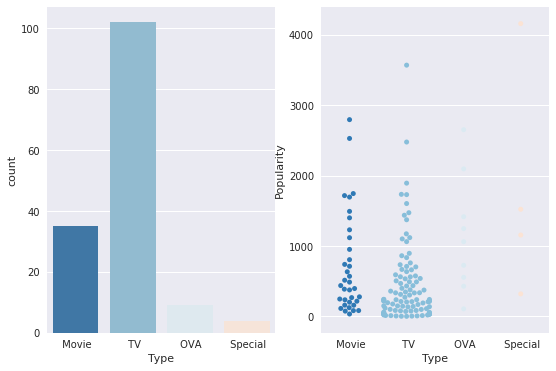

In [5]:
sb.set_palette('RdBu_r')
fig, axs = plt.subplots(ncols=2,figsize=(9,6))
sb.countplot(x=df.Type, data = df,ax=axs[0])
sb.swarmplot(x=df.Type,y=df.Popularity, ax=axs[1])

<p>Seems like there is a weird disconnect between the popularity of the show vs it's rank

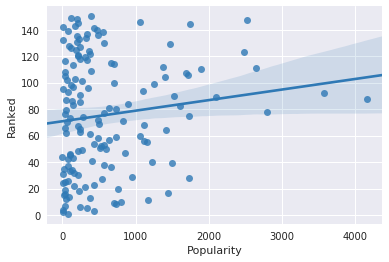

In [6]:
sb.regplot(x=df.Popularity, y=df.Ranked,fit_reg=True,scatter=True)


Calculating the Z values for popularity and score

In [7]:
float_numbers = [float(x) for x in df.Score]
avg = np.average(float_numbers)
div = 1.0/len(df.Score)
stddev = np.sqrt(div*np.sum([np.square(x - avg) for x in float_numbers]))
z_scores_score = [(x-avg)/stddev for x in float_numbers]

In [8]:
float_numbers = [float(x) for x in df.Popularity]
avg = np.average(float_numbers)
stddev = np.sqrt(div*np.sum([np.square(x - avg) for x in float_numbers]))
z_scores_pop = [(x-avg)/stddev for x in float_numbers]

<built-in method max of numpy.ndarray object at 0x000000001F33C080>


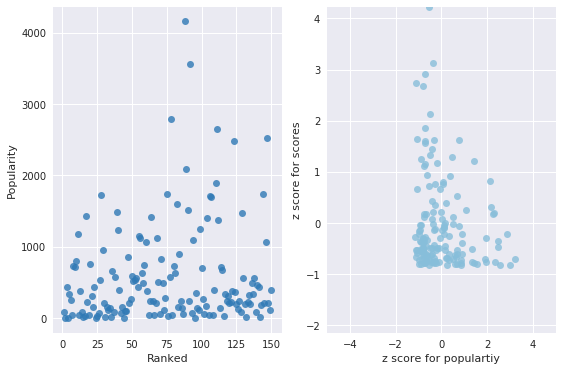

In [9]:
z_scores_score = np.array(z_scores_score)
z_scores_pop = np.array(z_scores_pop)
fig, axs = plt.subplots(ncols=2,figsize=(9,6))
print z_scores_score.max
plt.ylim(z_scores_score.min()-1,z_scores_score.max()+1)
plt.xlim(-5,5)
sb.regplot(x=df.Ranked, y=df.Popularity,fit_reg=False,scatter=True,ax=axs[0])
sb.regplot(x= z_scores_score,y=z_scores_pop,fit_reg=False,ax=axs[1],)
plt.xlabel('z score for populartiy')
plt.ylabel('z score for scores')

there seems to be some sort of verticle line that links these. The most popular shows have a varying degree of scores, while the shows with the lowest stdev for populartiy also have the lowest stdev of scores. Still not much of a correlation as of now

In [10]:
genre = set()
for x in df.Genres:
     for l in [k.split(',')[0][1:] for k in  x.split(',')]:
            genre.add(l)

In [11]:
scoredf = pd.DataFrame(index=genre)
total_scores = []
for x in genre:
    scores = []
    for k in enumerate(df.Genres):
        if x in k[1]:
            scores.append(df.Score.iloc[k[0]])
        else:
            scores.append(0)
    total_scores.append(scores)
total_scores = np.array(total_scores)    

Found out that certain genres dont show up nearly as much as others, and as such, should not contribute as much weight as the more popular genres

In [12]:
count_genres = []
for index, x in enumerate(total_scores):
    count_genres.append(0)
    for b in x:
        if b > 0:
            count_genres[index] += 1
genre_weights = np.array([np.average(x) for x in total_scores])

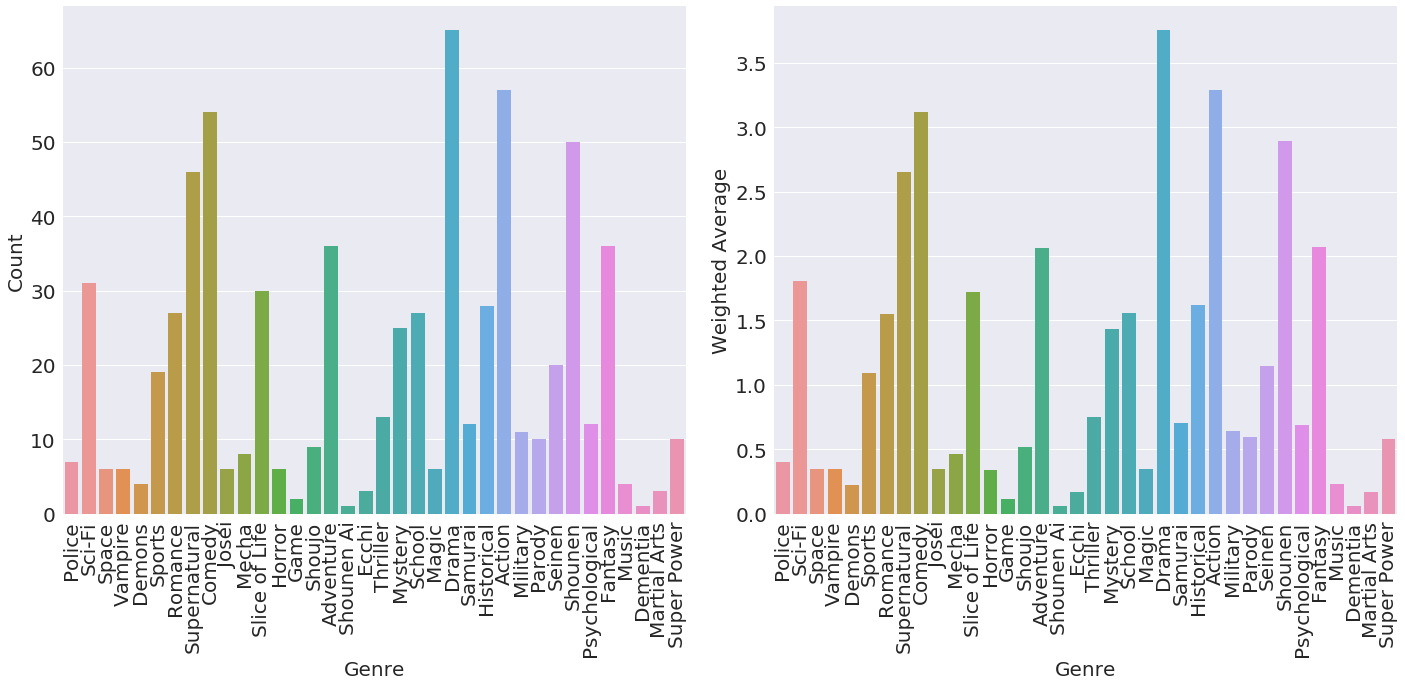

In [13]:
fig, axs = plt.subplots(ncols=2,figsize=(20,10))
g1 = sb.barplot(x=[k for k in genre],y=count_genres, ax=axs[0])
g2 = sb.barplot(x=[k for k in genre],y=genre_weights, ax=axs[1])
g1.set_ylabel('Count',fontsize=20), g2.set_ylabel('Weighted Average',fontsize=20)
for g in [g1,g2]:
    g.set_xlabel('Genre', fontsize=20)
    plt.setp(g.get_xticklabels(),rotation = 90,fontsize=20)
    plt.setp(g.get_yticklabels(),fontsize=20)

plt.tight_layout()

As noted above, the most dominant genre is drama followed by action and a tie between shounen and comedy.

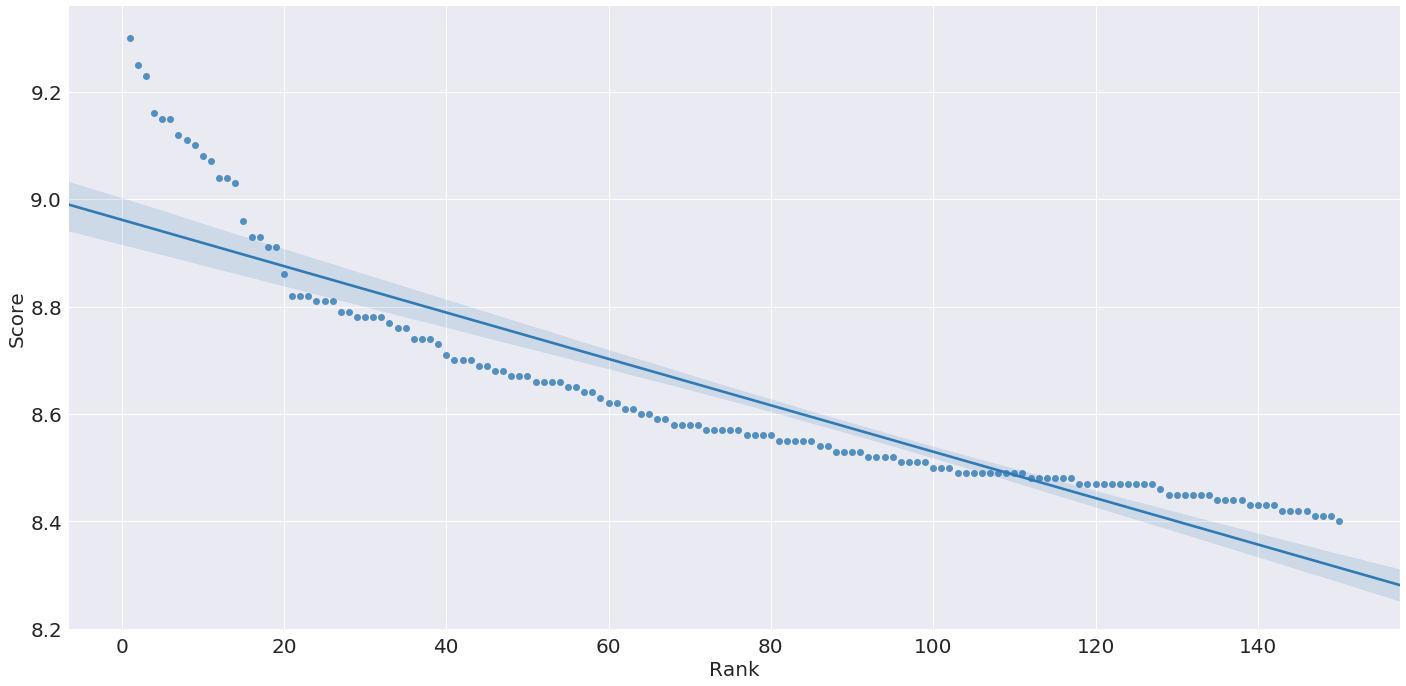

In [14]:
fig, axs = plt.subplots(ncols=1,figsize=(20,10))
g1 = sb.regplot(x=df.Ranked,y=df.Score,ax=axs)
g1.set_ylabel('Score',fontsize=20), g1.set_xlabel('Rank',fontsize=20)
plt.setp(g1.get_xticklabels(),fontsize=20),plt.setp(g1.get_yticklabels(),fontsize=20)
plt.tight_layout()


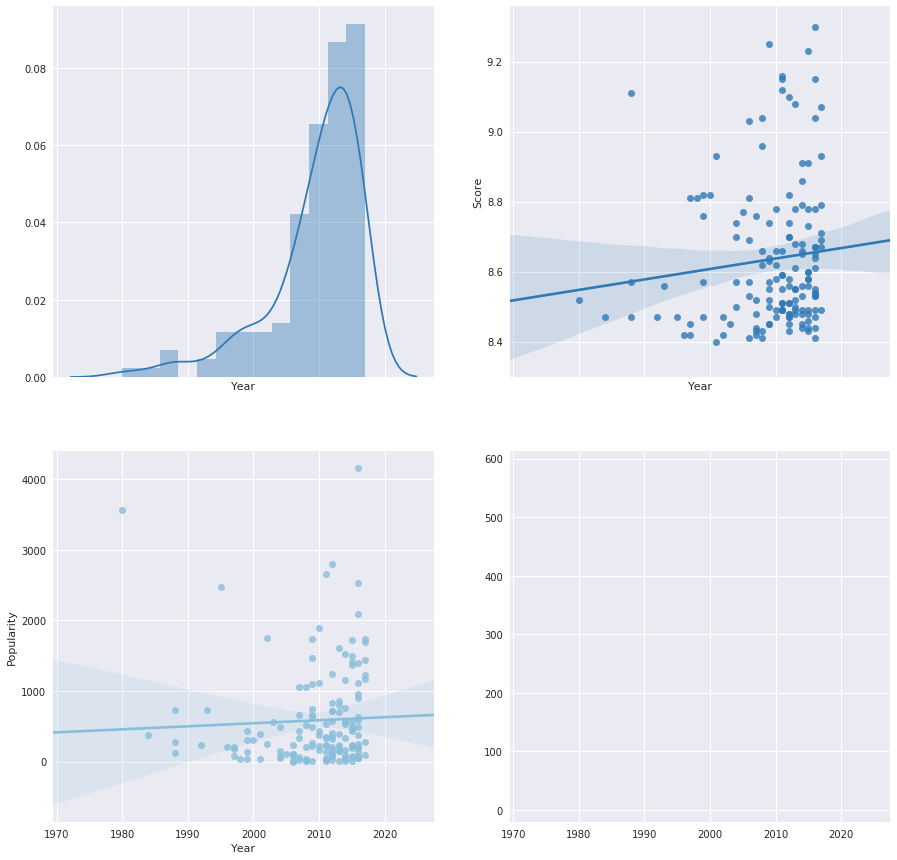

In [15]:
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
sb.distplot(df.Year,ax=axes[0,0])
sb.regplot(x='Year',data=df,y='Score',ax=axes[0,1])
sb.regplot(x='Year',data=df,y='Popularity',ax=axes[1,0])


In [16]:
np.average([len(list(k.split(','))) for k in df.Genres])

4.5999999999999996

In [17]:
pred_scores =[]
for k in df.Genres:
    scores_pred = []
    for x in k.split(','):
        x = x[1:]
        for s in enumerate(genre):
            if x == s[1]:
                scores_pred.append(genre_weights[s[0]])
    (pred_scores.append(np.sum(scores_pred)))

In [18]:
pearsonr(df.Popularity,df.Ranked)

(0.13051938193836868, 0.1113903827171835)